In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import scs
import numpy as np

import scs
import pandas as pd
pd.set_option('max_rows', 6)  # max number of rows to show in this notebook — to save space!

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from scipy.optimize import curve_fit
import shapely

In [261]:
# cols = ['prDM: Pressure, Digiquartz [db]', 't090C: Temperature [ITS-90, deg C]', 
#         't190C: Temperature, 2 [ITS-90, deg C]', 'c0S/m: Conductivity [S/m]',
#         'sal00: Salinity, Practical [PSU]', 'sal11: Salinity, Practical, 2 [PSU]',
#         'sbeox0V: Oxygen raw, SBE 43 [V]', 'sbeox0ML/L: Oxygen, SBE 43 [ml/l]',
#         'sbeox1V: Oxygen raw, SBE 43, 2 [V]', 'sbeox1ML/L: Oxygen, SBE 43, 2 [ml/l]',
#         'cpar: CPAR/Corrected Irradiance [%]', 'CStarAt0: Beam Attenuation, WET Labs C-Star [1/m]',
#         'CStarTr0: Beam Transmission, WET Labs C-Star [%]', 'par: PAR/Irradiance, Biospherical/Licor',
#         'v3: Voltage 3', 'wetCDOM: Fluorescence, WET Labs CDOM [mg/m^3]', 
#         'flECO-AFL: Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]', 'v4: Voltage 4', 'v5: Voltage 5',
#         'depSM: Depth [salt water, m]', 'sal00: Salinity, Practical [PSU]', 
#         'sigma-�00: Density [sigma-theta, kg/m^3]', 'sbeox0ML/L: Oxygen, SBE 43 [ml/l], WS = 5',
#         'sbeox1ML/L: Oxygen, SBE 43, 2 [ml/l], WS = 5', 'potemp090C: Potential Temperature [ITS-90, deg C]',
#         'potemp190C: Potential Temperature, 2 [ITS-90, deg C]', 'flag: flag']
cols = ['prDM: Pressure, Digiquartz [db]', 't090C: Temperature [ITS-90, deg C]', 
        't190C: Temperature, 2 [ITS-90, deg C]', 'c0S/m: Conductivity [S/m]',
        'sal11: Salinity, Practical, 2 [PSU]',
        'sbeox0V: Oxygen raw, SBE 43 [V]', 'sbeox0ML/L: Oxygen, SBE 43 [ml/l]',
        'sbeox1V: Oxygen raw, SBE 43, 2 [V]', 'sbeox1ML/L: Oxygen, SBE 43, 2 [ml/l]',
        'cpar: CPAR/Corrected Irradiance [%]', 'CStarAt0: Beam Attenuation, WET Labs C-Star [1/m]',
        'CStarTr0: Beam Transmission, WET Labs C-Star [%]', 'par: PAR/Irradiance, Biospherical/Licor',
        'v3: Voltage 3', 'wetCDOM: Fluorescence, WET Labs CDOM [mg/m^3]', 
        'flECO-AFL: Fluorescence, WET Labs ECO-AFL/FL [mg/m^3]', 'v4: Voltage 4', 'v5: Voltage 5',
        'depSM: Depth [salt water, m]', 'sal00: Salinity, Practical [PSU]',
        'sigma-00: Density [sigma-theta, kg/m^3]', 'sbeox0ML/L: Oxygen, SBE 43 [ml/l], WS = 5',
        'sbeox1ML/L: Oxygen, SBE 43, 2 [ml/l], WS = 5', 'potemp090C: Potential Temperature [ITS-90, deg C]',
        'potemp190C: Potential Temperature, 2 [ITS-90, deg C]', 'flag: flag']

In [286]:

keytemp = 't090C: Temperature [ITS-90, deg C]'  # 'potemp090C: Potential Temperature [ITS-90, deg C]' #   # 't190C: Temperature, 2 [ITS-90, deg C]', , 'potemp190C: Potential Temperature, 2 [ITS-90, deg C]'
keysalt = 'sal00: Salinity, Practical [PSU]'  # 'sal11: Salinity, Practical, 2 [PSU]'
keypress = 'prDM: Pressure, Digiquartz [db]'
keydens = 'sigma-00: Density [sigma-theta, kg/m^3]'
keypar = 'par: PAR/Irradiance, Biospherical/Licor'
keycdom = 'wetCDOM: Fluorescence, WET Labs CDOM [mg/m^3]'

In [102]:
# SCS data
# leg 1
loc1 = '/Volumes/GoogleDrive/Shared drives/Point Sur Data: Harvey Rapid Response Cruise Oct. 2017/Leg1/PS18_09_Leg1_DiMarco_SCS/Sea-Bird-Thermosalinograph-(converted-ASCII-data)_20170922-223421.Raw'
df1 = scs.read_file(loc1)

# leg 3
loc3 = '/Volumes/GoogleDrive/Shared drives/Point Sur Data: Harvey Rapid Response Cruise Oct. 2017/Leg3/PS18_09_Leg3_Campbell_SCS/Sea-Bird-Thermosalinograph-(converted-ASCII-data)_20170929-172721.Raw'
df3 = scs.read_file(loc3)


In [74]:
Files = glob('data/HRR_CTDfiles_cnvs/HRRLEG1_S??.cnv') + glob('data/HRR_CTDfiles_cnvs/S*.cnv')
Files

['data/HRR_CTDfiles_cnvs/HRRLEG1_S10.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S04.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S05.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S11.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S07.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S13.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S12.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S06.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S02.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S16.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S17.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S03.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S29.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S15.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S01.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S14.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S28.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S31.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S25.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S19.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S24.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S30.cnv',
 'data/HRR_CTDfiles_cnvs/HRRLEG1_S26.cnv',
 'data/HRR_

(27, 31)

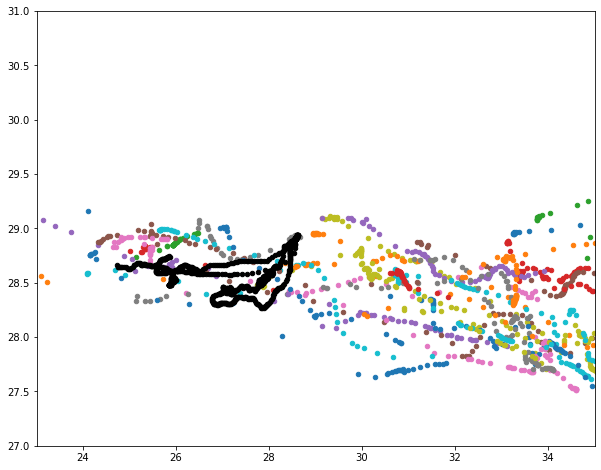

In [284]:

# drop second identically named salinity column
icols = list(range(27))
icols.pop(4)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

# CTD/rosette
for File in Files:
    df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols)
    ax.scatter(df[keysalt][3:], df[keytemp][3:], s=20)
    
# SCS
# ax.scatter(df3['Practical salinity'], df3['Temperature'], s=20)

time1 = '2017-9-23 6:30'
time2 = '2017-9-23 9:15'
# ax.scatter(df1['Practical salinity'], df1['Temperature'], s=20)
ax.scatter(df1['Practical salinity'][time1:time2], df1['Temperature'][time1:time2], s=20, color='k')

ax.set_xlim(23,35)
ax.set_ylim(27,31)

Text(0, 0.5, 'temp')

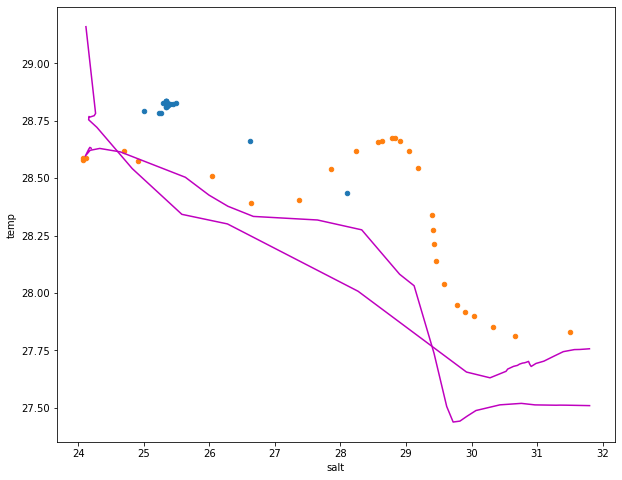

In [200]:

fig, ax = plt.subplots(1, 1, figsize=(10,8))

# CTD/rosette

# for File in ['data/HRR_CTDfiles_cnvs/HRRLEG1_S11.cnv','data/HRR_CTDfiles_cnvs/HRRLEG1_S16.cnv','data/HRR_CTDfiles_cnvs/HRRLEG1_S21.cnv','data/HRR_CTDfiles_cnvs/HRRLEG1_SS.cnv']:
#     df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols)
#     keytemp = 't090C: Temperature [ITS-90, deg C]'
#     keysalt = 'sal00: Salinity, Practical [PSU]'
#     ax.scatter(df[keysalt][3:], df[keytemp][3:], s=20)

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S11.cnv'
df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols)
ax.scatter(df[keysalt][3:], df[keytemp][3:], s=20)

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S16.cnv'
df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols)
ax.scatter(df[keysalt][3:], df[keytemp][3:], s=20)

color = 'm'
File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S21.cnv'
df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols)
ax.plot(df[keysalt][3:], df[keytemp][3:], color=color)

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_SS.cnv'
df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols)
ax.plot(df[keysalt][3:], df[keytemp][3:], color=color)

# SCS
# ax.scatter(df3['Practical salinity'], df3['Temperature'], s=20)

time1 = '2017-9-23 6:30'
time2 = '2017-9-23 9:15'
# ax.scatter(df1['Practical salinity'], df1['Temperature'], s=20)
# ax.scatter(df1['Practical salinity'][time1:time2], df1['Temperature'][time1:time2], s=20, color='k')

ax.set_xlabel('salt')
ax.set_ylabel('temp')

Text(0.5, 0, 'Temp')

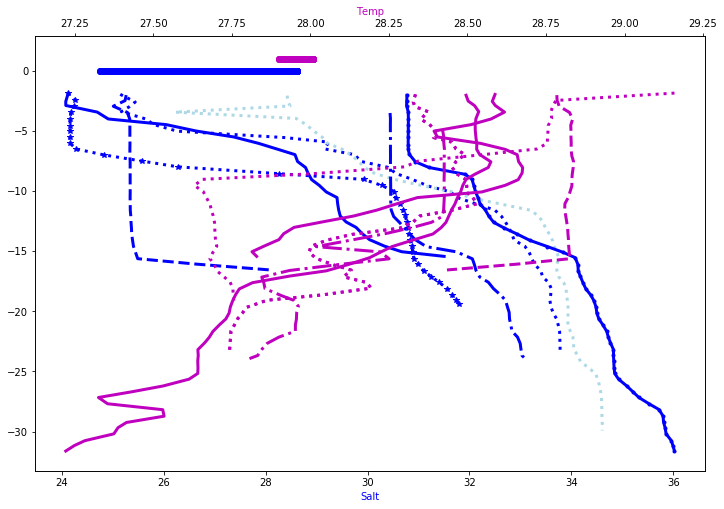

In [267]:
File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S16.cnv'
df16 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df16.index = -df16.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S17.cnv'
df17 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df17.index = -df17.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S19.cnv'
df19 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df19.index = -df19.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S20.cnv'
df20 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df20.index = -df20.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S11.cnv'
df11 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df11.index = -df11.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S21.cnv'
df21 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df21.index = -df21.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S22.cnv'
df22 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df22.index = -df22.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S23.cnv'
df23 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df23.index = -df23.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S24.cnv'
df24 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df24.index = -df24.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_S25.cnv'
df25 = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
df25.index = -df25.index

File = 'data/HRR_CTDfiles_cnvs/HRRLEG1_EMB.cnv'
dfEMB = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
dfEMB.index = -dfEMB.index


fig, ax = plt.subplots(1,1, figsize=(12,8))

lw=3
ls = ':'
ax.plot(df21[keysalt].iloc[3:], df21.index[3:], 'blue', ls=ls, lw=lw, marker='*')
ax2 = ax.twiny()
ax2.plot(df21[keytemp].iloc[3:], df21.index[3:], 'm', ls=ls, lw=lw)

ax.plot(df22[keysalt].iloc[3:], df22.index[3:], 'blue', ls=ls, lw=lw)
ax2.plot(df22[keytemp].iloc[3:], df22.index[3:], 'm', ls=ls, lw=lw)

ax.plot(df23[keysalt].iloc[3:], df23.index[3:], 'lightblue', ls=ls, lw=lw)
ax2.plot(df22[keytemp].iloc[3:], df22.index[3:], 'm', ls=ls, lw=lw)

# ax.plot(df24[keysalt].iloc[3:], df24.index[3:], 'blue', ls=ls, lw=lw)
# # ax2.plot(df22[keytemp].iloc[3:], df22.index[3:], 'm', ls=ls, lw=lw)

# ax.plot(df25[keysalt].iloc[3:], df25.index[3:], 'blue', ls=ls, lw=lw)
# # ax2.plot(df22[keytemp].iloc[3:], df22.index[3:], 'm', ls=ls, lw=lw)

ax.plot(df16[keysalt].iloc[3:], df16.index[3:], 'blue', lw=lw)
ax2.plot(df16[keytemp].iloc[3:], df16.index[3:], 'm', lw=lw)

ax.plot(df19[keysalt].iloc[3:], df19.index[3:], 'blue', lw=lw, marker='.')
ax2.plot(df19[keytemp].iloc[3:], df19.index[3:], 'm', lw=lw)

# ax.plot(df20[keysalt].iloc[3:], df20.index[3:], 'blue', lw=lw, marker='.')
# # ax2.plot(df20[keytemp].iloc[3:], df20.index[3:], 'm', lw=lw)

ax.plot(df11[keysalt].iloc[3:], df11.index[3:], 'blue', lw=lw, ls='--')
ax2.plot(df11[keytemp].iloc[3:], df11.index[3:], 'm', lw=lw, ls='--')


ax.plot(dfEMB[keysalt].iloc[0:], dfEMB.index[0:], 'blue', lw=lw, ls='-.')
ax2.plot(dfEMB[keytemp].iloc[3:], dfEMB.index[3:], 'm', lw=lw, ls='-.')

ax.scatter(df1['Practical salinity'][time1:time2], np.zeros(len(df1[time1:time2])),color='b')
ax.scatter(df1['Temperature'][time1:time2], np.ones(len(df1[time1:time2])),color='m')

# ADD STATION 17 BOTTLES


ax.set_xlabel('Salt', color='b')
ax2.set_xlabel('Temp', color='m')

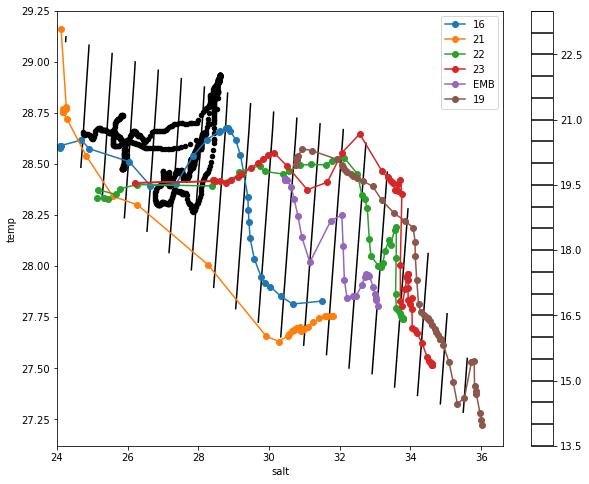

In [283]:
# TS with just surrounding stations
dfs = [df16, df21, df22, df23, dfEMB, df19]
names = ['16', '21', '22', '23','EMB', '19']

fig, ax = plt.subplots(1,1, figsize=(10,8))
spts = []
tpts = []
dpts = []
for dft in dfs:
    ax.plot(dft[keysalt].iloc[3:], dft[keytemp].iloc[3:], marker='o')
    spts.extend(dft[keysalt].iloc[3:].values)
    tpts.extend(dft[keytemp].iloc[3:].values)
    dpts.extend(dft[keydens].iloc[3:].values)

# SCS
# ax.scatter(df3['Practical salinity'], df3['Temperature'], s=20)

time1 = '2017-9-23 6:30'
time2 = '2017-9-23 9:15'
# ax.scatter(df1['Practical salinity'], df1['Temperature'], s=20)
ax.scatter(df1['Practical salinity'][time1:time2], df1['Temperature'][time1:time2], s=20, color='k')


# density
sarr = np.linspace(24,36)
tarr = np.linspace(27.24, 29.25)
Sarr, Tarr = np.meshgrid(sarr,tarr)
pts = np.vstack((spts,tpts)).T
xy = np.vstack((Sarr.flat, Tarr.flat)).T
import scipy.interpolate

Z1 = scipy.interpolate.griddata(pts, dpts, xy)
# reconstitute the output to structured array so we can plot it with pcolormesh
Z1.shape = Tarr.shape

mappable = ax.contour(Sarr, Tarr, Z1, 20, zorder=0, colors='k')
fig.colorbar(mappable)


ax.set_xlabel('salt')
ax.set_ylabel('temp')
ax.legend(names)

In [275]:
# Z1 = scipy.interpolate.griddata(pts, dpts, xy)
scipy.interpolate.griddata?

[array([24.116 , 24.0747, 24.0755, 24.6926, 24.9091, 26.0461, 26.6419,
        27.372 , 27.8595, 28.2432, 28.5756, 28.6261, 28.7826, 28.8286,
        28.903 , 29.0519, 29.1896, 29.4001, 29.4132, 29.4328, 29.4636,
        29.5797, 29.774 , 29.8954, 30.0381, 30.3305, 30.6695, 31.5035]),
 array([24.1163, 24.2636, 24.2421, 24.1764, 24.1624, 24.1592, 24.1592,
        24.1576, 24.1578, 24.2838, 24.8233, 25.5798, 26.275 , 28.2684,
        29.9226, 30.2815, 30.5255, 30.5515, 30.6404, 30.6995, 30.7312,
        30.7785, 30.7988, 30.81  , 30.833 , 30.8694, 30.8877, 30.9091,
        30.983 , 31.1029, 31.2527, 31.3994, 31.5686, 31.6485, 31.7445,
        31.7985]),
 array([25.1443, 25.4384, 25.3256, 25.1651, 25.6621, 25.7894, 26.2624,
        28.3862, 29.2373, 29.1568, 29.7406, 29.8771, 30.4006, 30.5623,
        30.876 , 31.1943, 31.6174, 31.7712, 32.1255, 32.4981, 32.6247,
        32.7069, 32.7796, 32.8338, 32.8804, 33.0887, 33.172 , 33.223 ,
        33.2823, 33.3973, 33.4369, 33.5532, 33.6027, 33.

In [207]:

df17

,"t090C: Temperature [ITS-90, deg C]","t190C: Temperature, 2 [ITS-90, deg C]",c0S/m: Conductivity [S/m],"sal11: Salinity, Practical, 2 [PSU]","sbeox0V: Oxygen raw, SBE 43 [V]","sbeox0ML/L: Oxygen, SBE 43 [ml/l]","sbeox1V: Oxygen raw, SBE 43, 2 [V]","sbeox1ML/L: Oxygen, SBE 43, 2 [ml/l]",cpar: CPAR/Corrected Irradiance [%],"CStarAt0: Beam Attenuation, WET Labs C-Star [1/m]",...,v4: Voltage 4,v5: Voltage 5,"depSM: Depth [salt water, m]","sal00: Salinity, Practical [PSU]","sigma-�00: Density [sigma-theta, kg/m^3]","sbeox0ML/L: Oxygen, SBE 43 [ml/l], WS = 5","sbeox1ML/L: Oxygen, SBE 43, 2 [ml/l], WS = 5","potemp090C: Potential Temperature [ITS-90, deg C]","potemp190C: Potential Temperature, 2 [ITS-90, deg C]",flag: flag
"prDM: Pressure, Digiquartz [db]",,,,,,,,,,,,,,,,,,,,,
-23.667,28.1345,28.1336,5.528517,34.2401,2.427,3.8840,2.3833,4.1323,99999.0,2.3040,...,-0.6644,0.0,23.5,34.2352,21.7776,3.8890,4.1284,28.1289,28.1280,0.0
-24.003,28.1314,28.1325,5.528765,34.2407,2.433,3.9113,2.3848,4.1323,99999.0,2.2986,...,6.9525,0.0,24.0,34.2391,21.7815,3.9035,4.1368,28.1258,28.1269,0.0


In [452]:
# Files = glob('data/HRR_CTDfiles_cnvs/HRRLEG1_*.cnv') #+ glob('data/HRR_CTDfiles_cnvs/S*.cnv')
Files = glob('data/HRR_CTDfiles_cnvs/S*.cnv')
# Files = glob('data/HRR_CTDfiles_cnvs/HRRLEG1_S??.cnv') #+ glob('data/HRR_CTDfiles_cnvs/S*.cnv')
# base = 'data/HRR_CTDfiles_cnvs/HRRLEG1_'
# names = ['S01', 'WF', 'GI', 'S02', 'SS', 'S21', 'S16', 'S11']
# Files = [base + name + '.cnv' for name in names]
Files

['data/HRR_CTDfiles_cnvs/S01.cnv',
 'data/HRR_CTDfiles_cnvs/S17.cnv',
 'data/HRR_CTDfiles_cnvs/SS.cnv',
 'data/HRR_CTDfiles_cnvs/S16.cnv',
 'data/HRR_CTDfiles_cnvs/S06.cnv',
 'data/HRR_CTDfiles_cnvs/S12.cnv',
 'data/HRR_CTDfiles_cnvs/S07.cnv',
 'data/HRR_CTDfiles_cnvs/S11.cnv',
 'data/HRR_CTDfiles_cnvs/S21.cnv',
 'data/HRR_CTDfiles_cnvs/S22.cnv']

In [432]:
ll = pd.read_csv('data/ll.csv', index_col=0)
ll.loc['SA']

Dates        2017-09-24 00:00:00 15:46:00
depth [m]                              26
lat                               27.9576
lon                              -96.5831
Name: SA, dtype: object

In [433]:
merc = cartopy.crs.Mercator(central_longitude=-90)
pc = cartopy.crs.PlateCarree()
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
smin = 22  # min((df1[key].min(), df3[key].min()))
smax = 30  # max((df1[key].max(), df3[key].max()))
s = 150  # scatter marker size

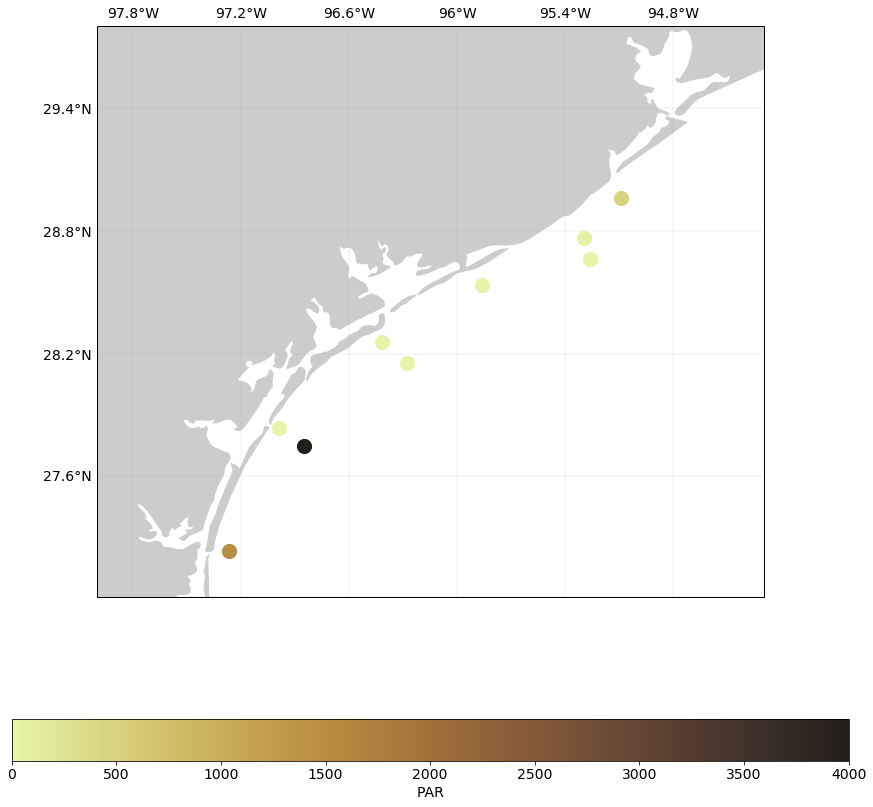

In [436]:
# PAR
# fig, ax = plt.subplots(1, 1, figsize=(10,8))

fig, axes = plt.subplots(1,1, subplot_kw={'projection': merc}, figsize=(15,15))
ax = axes
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')


# CTD/rosette
for File in Files:
    df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
    df.index = -df.index
    station = File.split('/')[-1].split('_')[-1].split('.')[0]
    if station == 'S17':
        continue
#     ax.plot(df[keypar].iloc[3:], df.index[3:], lw=3)
    lon = ll['lon'][station]
    lat = ll['lat'][station]
#     print(lon, lat)
    if not isinstance(lon, float):
        lon = lon.values[1]
        lat = lat.values[1]
#     mappable = ax.scatter(lon, lat, c=df[keypar].iloc[3])#, s=s, cmap=cmo.turbid, transform=pc)
    mappable = ax.scatter([lon], [lat], c=[df[keypar].iloc[2]], s=200, cmap=cmo.turbid, transform=pc, vmin=0, vmax=4000)
#     print(df[keypar].iloc[3])

cb = fig.colorbar(mappable, orientation='horizontal')
cb.set_label('PAR')


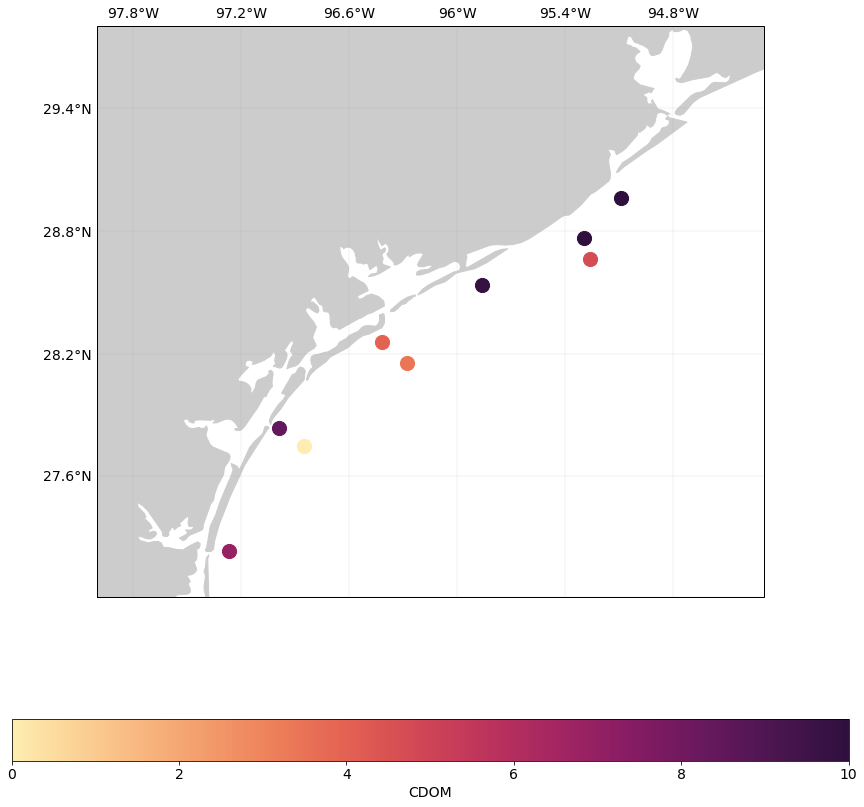

In [453]:
# PAR
# fig, ax = plt.subplots(1, 1, figsize=(10,8))

fig, axes = plt.subplots(1,1, subplot_kw={'projection': merc}, figsize=(15,15))
ax = axes
ax.set_frame_on(False) # kind of like it without the box
ax.set_extent([-98, -94.3, 27, 29.8], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')


# CTD/rosette
for File in Files:
    df = pd.read_table(File, skiprows=381, delim_whitespace=True, header=None, names=cols, usecols=icols, index_col=0)
    df.index = -df.index
    station = File.split('/')[-1].split('_')[-1].split('.')[0]
    if station == 'S17':
        continue
#     ax.plot(df[keypar].iloc[3:], df.index[3:], lw=3)
    lon = ll['lon'][station]
    lat = ll['lat'][station]
#     print(lon, lat)
    if not isinstance(lon, float):
        lon = lon.values[1]
        lat = lat.values[1]
#     mappable = ax.scatter(lon, lat, c=df[keypar].iloc[3])#, s=s, cmap=cmo.turbid, transform=pc)
    mappable = ax.scatter([lon], [lat], c=[df[keycdom].iloc[2]], s=200, cmap=cmo.matter, transform=pc, vmin=0, vmax=10)
#     print(df[keycdom].iloc[3])

cb = fig.colorbar(mappable, orientation='horizontal')
cb.set_label('CDOM')


In [455]:
keycdom

'wetCDOM: Fluorescence, WET Labs CDOM [mg/m^3]'

In [ ]:
# WOA
loc = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/temperature/decav/0.25/woa18_decav_t09_04.nc'
ds = xr.open_dataset(loc, decode_times=False)
ds